In [2]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import *
from FRSolver import * 

%matplotlib inline

In [3]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

In [4]:
exs = np.linspace(0.05,0.15,200)
eys = np.flip(np.linspace(-0.14, -0.19, 100))

In [5]:
T = 1000
C = 0.2

In [5]:
E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
ts = []
Es = []
variances = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        pxhat = p1 + ex
        pyhat = p2 + ey

        # velocity 
        v1hat = np.array([pxhat,pyhat,0], dtype="float64")
        v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
        v3hat = np.array([pxhat,pyhat,0], dtype="float64")
        v0shat = np.array([v1hat,v2hat,v3hat])

        R = findR(v0shat, E0, masses)
        
        # position
        r1hat = np.array([-R,0.0,0.0], dtype="float64")
        r2hat = np.array([0,0.0,0.0], dtype="float64")
        r3hat = np.array([R,0.0,0.0], dtype="float64")
        r0shat = np.array([r1hat,r2hat,r3hat])
        

        stability, variance, maxE, maxT = shapeSolver(T, C, r0shat, v0shat, G, masses)

        variances.append(variance)
        stabilities.append(stability)
        ts.append(maxT)
        Es.append(maxE)

stabilities = np.array(stabilities).reshape(len(exs), len(eys))
Es = np.array(stabilities).reshape(len(exs), len(eys))
ts = np.array(ts).reshape(len(exs), len(eys))
variances = np.array(variances).reshape(len(exs), len(eys))

0.05 -0.19
0.05 -0.1894949494949495
0.05 -0.18898989898989899
0.05 -0.18848484848484848
0.05 -0.18797979797979797
0.05 -0.18747474747474746
0.05 -0.18696969696969698
0.05 -0.18646464646464647
0.05 -0.18595959595959596
0.05 -0.18545454545454546
0.05 -0.18494949494949495
0.05 -0.18444444444444444
0.05 -0.18393939393939396
0.05 -0.18343434343434345
0.05 -0.18292929292929294
0.05 -0.18242424242424243
0.05 -0.18191919191919192
0.05 -0.18141414141414142
0.05 -0.1809090909090909
0.05 -0.1804040404040404
0.05 -0.1798989898989899
0.05 -0.17939393939393938
0.05 -0.1788888888888889
0.05 -0.1783838383838384
0.05 -0.1778787878787879
0.05 -0.17737373737373738
0.05 -0.17686868686868687
0.05 -0.17636363636363636
0.05 -0.17585858585858588
0.05 -0.17535353535353537
0.05 -0.17484848484848486
0.05 -0.17434343434343436
0.05 -0.17383838383838385
0.05 -0.17333333333333334
0.05 -0.17282828282828283
0.05 -0.17232323232323232
0.05 -0.17181818181818181
0.05 -0.1713131313131313
0.05 -0.17080808080808083
0.05 -0.1

In [6]:
import pandas as pd 
df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/variances.csv")

df = pd.DataFrame(stabilities)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/stabilities.csv")

df = pd.DataFrame(Es)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Es.csv")

df = pd.DataFrame(ts)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/ts.csv")

In [17]:
print(np.max(variances))

15621.0


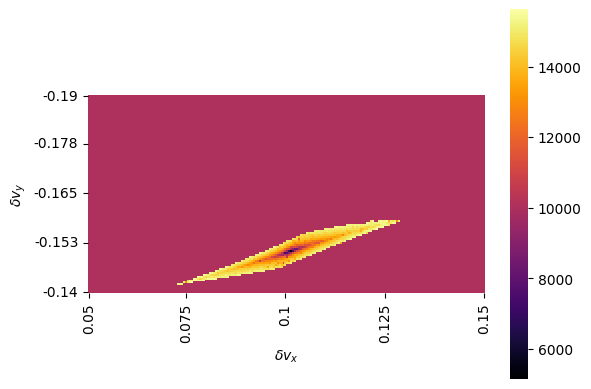

In [15]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(variances.T,cmap = 'inferno',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

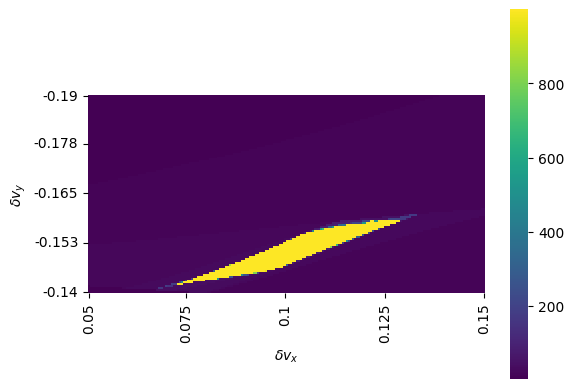

In [18]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(ts.T,cmap = 'viridis',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

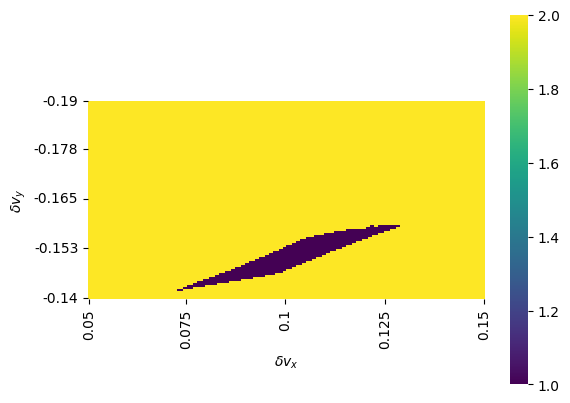

In [9]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(Es.T,cmap = 'viridis',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

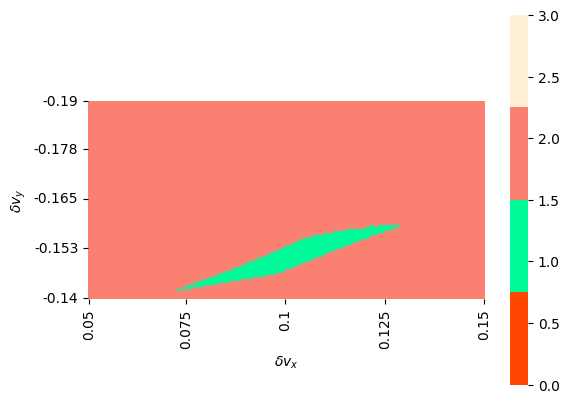

In [10]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

cmap = ListedColormap(['orangered','mediumspringgreen','salmon','papayawhip'])
# cmap = sns.color_palette('tab10', n_colors=4)

# Create the heatmap using Seaborn
sns.heatmap(stabilities.T,cmap = cmap,  cbar=True, ax=ax, vmin=0, vmax=3)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

In [21]:
exs = np.linspace(0.065,0.135,101)
eys = np.linspace(-0.14, -0.16, 101)

In [22]:
T = 300
C = 0.3

In [23]:
E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
ts = []
Es = []
variances = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        pxhat = p1 + ex
        pyhat = p2 + ey

        # velocity 
        v1hat = np.array([pxhat,pyhat,0], dtype="float64")
        v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
        v3hat = np.array([pxhat,pyhat,0], dtype="float64")
        v0shat = np.array([v1hat,v2hat,v3hat])

        R = findR(v0shat, E0, masses)
        
        # position
        r1hat = np.array([-R,0.0,0.0], dtype="float64")
        r2hat = np.array([0,0.0,0.0], dtype="float64")
        r3hat = np.array([R,0.0,0.0], dtype="float64")
        r0shat = np.array([r1hat,r2hat,r3hat])
        

        stability, variance, maxE, maxT = shapeSolver(T, C, r0shat, v0shat, G, masses, defaultVar = 20000)

        variances.append(variance)
        stabilities.append(stability)
        ts.append(maxT)
        Es.append(maxE)

stabilities = np.array(stabilities).reshape(len(exs), len(eys))
Es = np.array(stabilities).reshape(len(exs), len(eys))
ts = np.array(ts).reshape(len(exs), len(eys))
variances = np.array(variances).reshape(len(exs), len(eys))

0.065 -0.14
0.065 -0.14020000000000002
0.065 -0.14040000000000002
0.065 -0.1406
0.065 -0.1408
0.065 -0.14100000000000001
0.065 -0.14120000000000002
0.065 -0.14140000000000003
0.065 -0.1416
0.065 -0.1418
0.065 -0.14200000000000002
0.065 -0.14220000000000002
0.065 -0.1424
0.065 -0.1426
0.065 -0.1428
0.065 -0.14300000000000002
0.065 -0.14320000000000002
0.065 -0.1434
0.065 -0.1436
0.065 -0.1438
0.065 -0.14400000000000002
0.065 -0.14420000000000002
0.065 -0.1444
0.065 -0.1446
0.065 -0.1448
0.065 -0.14500000000000002
0.065 -0.14520000000000002
0.065 -0.1454
0.065 -0.1456
0.065 -0.1458
0.065 -0.14600000000000002
0.065 -0.1462
0.065 -0.1464
0.065 -0.1466
0.065 -0.1468
0.065 -0.14700000000000002
0.065 -0.1472
0.065 -0.1474
0.065 -0.1476
0.065 -0.14780000000000001
0.065 -0.14800000000000002
0.065 -0.1482
0.065 -0.1484
0.065 -0.1486
0.065 -0.14880000000000002
0.065 -0.14900000000000002
0.065 -0.1492
0.065 -0.1494
0.065 -0.1496
0.065 -0.14980000000000002
0.065 -0.15000000000000002
0.065 -0.1502
0

In [24]:
import pandas as pd 
df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/variances2.csv")

df = pd.DataFrame(stabilities)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/stabilities2.csv")

df = pd.DataFrame(Es)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/Es2.csv")

df = pd.DataFrame(ts)
df.to_csv("Data/Fig8/Fig8VarianceAnomaly/ts2.csv")

In [25]:
variances2 = np.array(pd.read_csv('Data/Fig8/Fig8VarianceAnomaly/variances2.csv'))[:,1:]

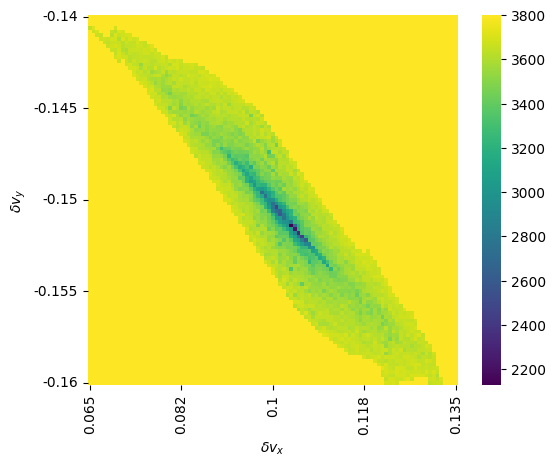

In [31]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(variances2.T,cmap = 'viridis',  cbar=True, ax=ax, vmax = 3800)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances2.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances2.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

In [38]:
index = np.unravel_index(np.argmin(variances2), variances2.shape)
print(index[0])

55


In [37]:
print(exs[55])
print(eys[57])

0.10350000000000001
-0.1514
